# ESL calculations
***code prepared by Alessio Rovere, MARUM, University of Bremen, DE. Contact: arovere@marum.de<br>
Date: 04/06/2020***

This script calculates global mean sea level from paleo RSL data and estiamtes of GIA and vertical land motions.  

1. Paleo Relative Sea Level (RSL) and associated uncertainty.
2. Glacial Isostatic Adjustment (GIA) prediction and associated standard deviation
3. Vertical land motion (VLM) rate and associated uncertainty
4. Age and associated uncertainty

ESL is calculated following the formulas summarized in Table 1 of Rovere et al., 2016 (*Earth Science Reviews*, **159**).
The script allows to compare ESL calculated from two different indicators and a set of reference values.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## RSL indicator 1
Data for the first RSL indicator.

In [72]:
#Insert data here
RSL1mu = 36.2 #meters
RSL1sd = 2.7 

GIA1mu = -14.6 #meters
GIA1sd = 3.2

VLR1mu = 5.74 #m/Ma
VLR1sd = 1.8

Age1mu = 4.98 #Ma
Age1sd = 0.23

## RSL indicator 2
Data for the first RSL indicator.

In [73]:
#Insert data here
RSL2mu = 35.1 #meters
RSL2sd = 2.2 

GIA2mu = -9.6 #meters
GIA2sd = 1.6

VLR2mu = 4.65 #m/Ma
VLR2sd = 7.79

Age2mu= 4.63
Age2sd= 0.36

# Calculate and plot ESL

In [74]:
VLM1mu=VLR1mu*Age1mu
VLM1sd=np.abs(VLM1mu)*(np.sqrt(np.square(VLR1sd/VLR1mu)+np.square(Age1sd/Age1mu)))
ESL1mu=RSL1mu-GIA1mu-VLM1mu
ESL1sd=np.sqrt(np.square(RSL1sd)+np.square(GIA1sd)+np.square(VLM1sd))

VLM2mu=VLR2mu*Age2mu
VLM2sd=np.abs(VLM2mu)*(np.sqrt(np.square(VLR2sd/VLR2mu)+np.square(Age2sd/Age2mu)))
ESL2mu=RSL2mu-GIA2mu-VLM2mu
ESL2sd=np.sqrt(np.square(RSL2sd)+np.square(GIA2sd)+np.square(VLM2sd))

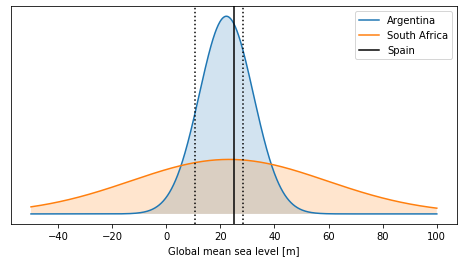

In [75]:
#Plots
x = np.linspace(-50, 100, 1000)
y = scipy.stats.norm.pdf(x,ESL1mu,ESL1sd)
y2 = scipy.stats.norm.pdf(x,ESL2mu,ESL2sd)
fig, ax = plt.subplots(1,figsize=(8,4))
ax.plot(x, y,label='Argentina')
ax.plot(x, y2,label='South Africa')
ax.fill_between(x, y, alpha='0.2')
ax.fill_between(x, y2, alpha='0.2')
ax.set_xlabel('Global mean sea level [m]')
ax.set_yticks([]) 
plt.axvline(x=10.6, color='k', linestyle='dotted')
plt.axvline(x=25.1, color='k',label='Spain')
plt.axvline(x=28.3, color='k', linestyle='dotted')
ax.legend(loc='best')
plt.show()

In [76]:
ESL1mu,ESL1sd

(22.2148, 9.981293705727731)

In [77]:
ESL2mu,ESL2sd

(23.1705, 36.20885608922215)

***
## License
This software is relased under the MIT license.

Copyright 2020 Alessio Rovere

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
***
# Research funding acknowledgments
This script and associated data were created in the framework of the European Reasearch Council Starting Grant WARMCOASTS (Grant Agreement Number 802414), funded under the European Union's Horizon 2020 research and Innovation programme.
***
# How to cite
<a href="https://zenodo.org/badge/latestdoi/243504113"><img align="left" src="https://zenodo.org/badge/243504113.svg" alt="DOI"></a>
<br>